## Case Study: Telco Customer Churn Prediction using ANN
Based on the introduction the key challenge is to predict if an individual customer will churn or not. To accomplish that, ANN Based deep learning are trained based on 80% of the sample data. The remaining 20% are used to apply the trained models and assess their predictive power with regards to “churn / not churn”.

To compare models and select the best for this task, the accuracy is measured. Based on other characteristics of the data, for example the balance between classes (number of “churners” vs. “non-churners” in data set) further metrics are considered if needed.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df= pd.read_csv('telco_customer_churn_dataset.csv')

In [52]:
df.sample(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1558,0637-YLETY,Female,0,No,No,16,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),95.60,1555.65,Yes
722,4952-YSOGZ,Female,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.95,381.3,Yes
5148,6196-HBOBZ,Male,0,Yes,No,65,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,Yes,Electronic check,99.35,6347.55,No
4027,5590-YRFJT,Female,0,Yes,No,20,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.45,482.8,Yes
6435,0298-XACET,Male,0,Yes,Yes,52,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,50.20,2554,No
4518,8808-ELEHO,Male,1,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.25,585.95,Yes


In [53]:
df.drop('customerID', axis ='columns', inplace= True)  #inplace=True update the datadf

In [54]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [56]:
df.TotalCharges.values                             #we need to covert into float64 as per total charges

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [57]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [58]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [59]:
df.shape

(7043, 20)

In [60]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [61]:
df.iloc[488].TotalCharges

' '

In [62]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [63]:
df1= df[df.TotalCharges!=' ']

In [64]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [65]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Faizan_Shakeel\AppData\Local\Temp\ipykernel_13280\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [66]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [67]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [68]:
df1.replace('No internet service','No', inplace= True)
df1.replace('No phone service','No', inplace= True)

C:\Users\Faizan_Shakeel\AppData\Local\Temp\ipykernel_13280\3263382668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace= True)
C:\Users\Faizan_Shakeel\AppData\Local\Temp\ipykernel_13280\3263382668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace= True)


In [69]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### Convert Yes and No to 1 or 0

In [70]:
Yes_No_Columns = ['Partner','PhoneService','Dependents','StreamingMovies','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','PaperlessBilling','Churn']

for column in Yes_No_Columns:
    df1[column].replace({'Yes':1,'No':0},inplace=True)

C:\Users\Faizan_Shakeel\AppData\Local\Temp\ipykernel_13280\2785274812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column].replace({'Yes':1,'No':0},inplace=True)


In [19]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [71]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [72]:
df1.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
904,Male,0,1,1,67,1,0,DSL,1,1,1,0,1,1,Two year,0,Credit card (automatic),81.35,5398.60,0
1568,Male,1,0,0,11,1,1,Fiber optic,0,1,1,1,1,1,Month-to-month,1,Electronic check,111.40,1183.05,0
1649,Female,0,0,0,27,1,0,DSL,0,1,0,1,0,0,Month-to-month,1,Mailed check,56.15,1439.35,0
3821,Female,1,0,0,1,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,74.20,74.20,1
3772,Male,0,1,0,1,1,0,Fiber optic,1,0,0,0,1,1,Month-to-month,1,Electronic check,95.00,95.00,1
4904,Female,0,0,0,33,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,0,Electronic check,107.55,3645.50,0


In [74]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [75]:
df1['gender'].replace({'Female':1,'Male':0}, inplace=True)      #Female 1 and Male : 0 

C:\Users\Faizan_Shakeel\AppData\Local\Temp\ipykernel_13280\2810452449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0}, inplace=True)      #Female 1 and Male : 0


In [76]:
df1.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1458,0,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,0,Electronic check,20.55,20.55,1
5096,0,0,1,1,71,1,1,DSL,1,1,1,1,1,1,Two year,0,Bank transfer (automatic),86.85,6263.80,0
67,1,0,0,0,31,1,0,DSL,0,1,1,1,1,1,Two year,0,Mailed check,79.20,2497.20,0
1064,1,0,0,0,14,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.70,795.15,0
4630,0,0,0,0,22,1,1,DSL,1,1,1,0,0,0,Month-to-month,0,Mailed check,65.05,1427.55,0
1950,0,0,1,0,65,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Bank transfer (automatic),91.85,5940.85,1


In [77]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [79]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


#### One hot encoding for categorical columns

In [119]:
print(df1.shape)

#One hot encoding for categorical columns
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
print(df2.shape)

(7032, 20)
(7032, 27)


(7032, 27)


In [82]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [83]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2744,1,0,1,0,42,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
6506,1,0,0,0,13,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2632,1,0,0,0,55,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
3415,1,0,1,1,68,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2523,1,0,1,1,47,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
880,0,0,0,0,10,1,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0
232,0,0,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
5663,1,0,1,1,37,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5692,0,0,1,1,9,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6174,0,0,0,0,4,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


## Visulization

In [85]:
df2[df2.Churn==0].shape

(5163, 27)

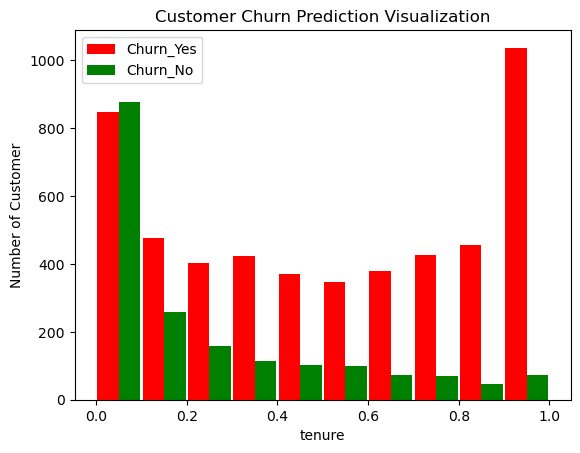

In [116]:
tenure_Churn_No = df2[df2.Churn==0].tenure
tenure_Churn_Yes = df2[df2.Churn==1].tenure

plt.hist([tenure_Churn_No,tenure_Churn_Yes], color=['red','green'], label=['Churn_Yes','Churn_No'], rwidth=0.95)

plt.xlabel('tenure')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction Visualization')

plt.legend()

## Scaling

In [88]:
#df2.sample(10)

Col_to_Scale = ['tenure','MonthlyCharges','TotalCharges' ]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[Col_to_Scale] = scaler.fit_transform(df2[Col_to_Scale])

In [89]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5236,0,0,0,0,0.563380,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3122,0,1,1,1,0.943662,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
6654,1,0,1,0,0.084507,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5244,1,0,0,0,0.619718,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
6004,1,0,1,1,0.929577,1,0,1,1,1,...,0,1,0,0,1,0,1,0,0,0


## Train and Test Split

In [90]:
X = df2.drop('Churn', axis='columns')
y= df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =5)

In [45]:
print(X_train.shape)
X_train[:10]

(5625, 26)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,No,No,0.126761,Yes,No,No,No,Yes,...,0,1,0,1,0,0,0,1,0,0
101,1,0,Yes,Yes,0.000000,Yes,No,No,No,No,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,Yes,No,0.985915,Yes,No,No,Yes,Yes,...,1,0,0,0,0,1,0,1,0,0
392,1,1,No,No,0.014085,Yes,No,No,No,No,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,Yes,No,0.816901,Yes,Yes,No,No,Yes,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,No,No,0.169014,Yes,No,Yes,No,No,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,Yes,No,0.323944,No,No,No,No,Yes,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,Yes,No,0.704225,Yes,No,Yes,Yes,No,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,No,No,0.042254,No,No,No,No,No,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,No,No,0.985915,Yes,Yes,No,No,No,...,0,0,1,0,0,1,1,0,0,0


In [91]:
len(X_train.columns)

26

# Model Building: ANN using tensorlfow and Keras

In [100]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(5, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics= ['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7358
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.7929
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8034
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8084
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8098
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8128
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8108
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.8112
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4016 - accura

In [101]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.7520


[0.5821340084075928, 0.7519544959068298]

In [102]:
yp= model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 451us/step


array([[0.42923808],
       [0.38382936],
       [0.01196768],
       [0.8238873 ],
       [0.99152267]], dtype=float32)

In [103]:
y_pred = []

for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [104]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 1]

In [105]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

#### Evaluation

In [109]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       999
           1       0.58      0.54      0.56       408

    accuracy                           0.75      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.75      0.75      0.75      1407



Text(70.72222222222221, 0.5, 'Truth')

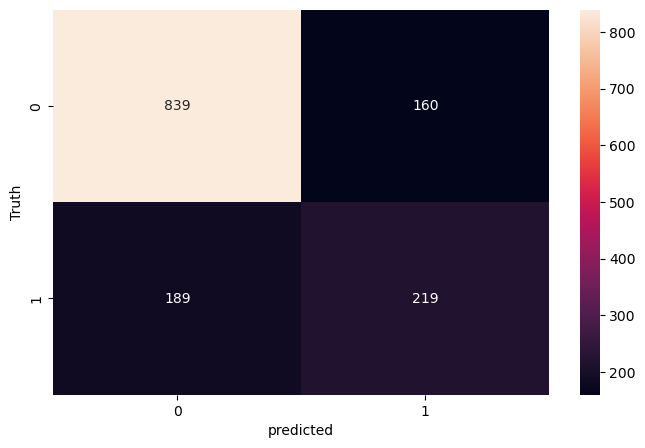

In [113]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize= (8,5))
sn.heatmap(cm, annot = True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

### Thank You:

Faizan Shakeel | 03-04-2023